<a href="https://colab.research.google.com/github/danielhutapea36/Tutorial/blob/main/preprocessing_datasetlubang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


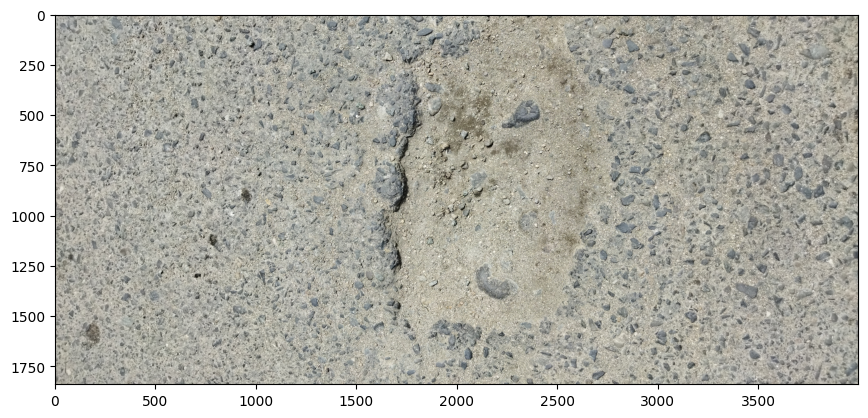

In [3]:
import tensorflow
import keras
import os
import glob
import skimage
from skimage import color
from skimage import io
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Importing and Loading the data into a data frame
dataset_path = '/content/drive/MyDrive/lubangjalan'
class_names = ['lubanglebar', 'lubangsempit']

#apply glob module to retrieve files/pathnames
lubangjalan = os.path.join(dataset_path, class_names[1], '*')
lubangjalan = glob.glob(lubangjalan)

#accessing an image file form the dataset classes
image = io.imread(lubangjalan[4])

#plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Text(0.5, 0.98, 'Original & RGB channels')

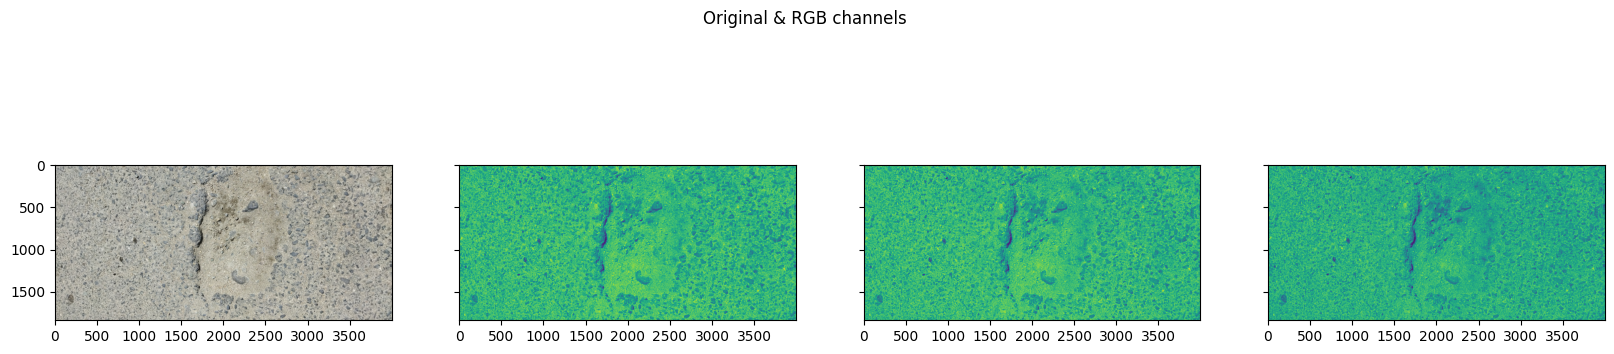

In [4]:
#plotting the original image and the RGB channels

i, (im1, im2, im3, im4) = plt.subplots(1,4, sharey=True)
i.set_figwidth(20)

im1.imshow(image) #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB channels')

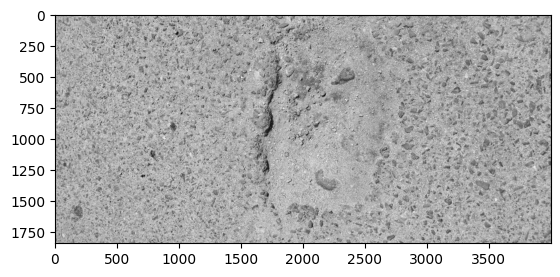

In [5]:
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

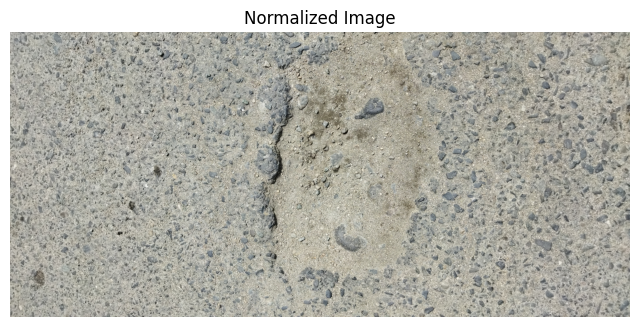

In [6]:
# Normalizing the image
norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))

# Plotting the normalized image
plt.figure(figsize=(8, 6))
plt.imshow(norm_image)
plt.title('Normalized Image')
plt.axis('off')
plt.show()

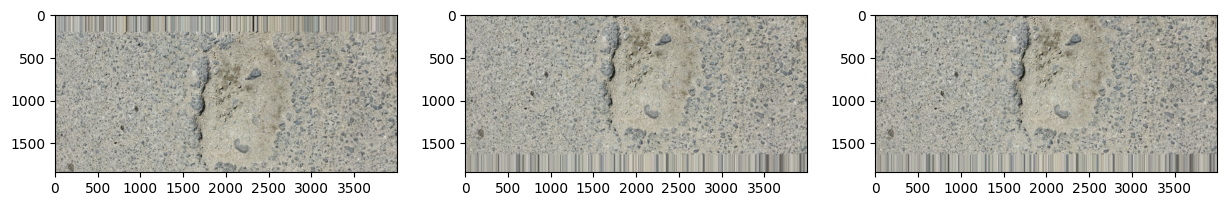

In [7]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

#convert to numpy array
data = img_to_array(image)

#expand dimension to one sample
samples = expand_dims(image, 0)

#create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

#create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

#generate batch of images
for i in range (3) :
  #conver to unsigned integers
  image = next(it)[0].astype('uint8')


  #plot image
  im[i].imshow(image)

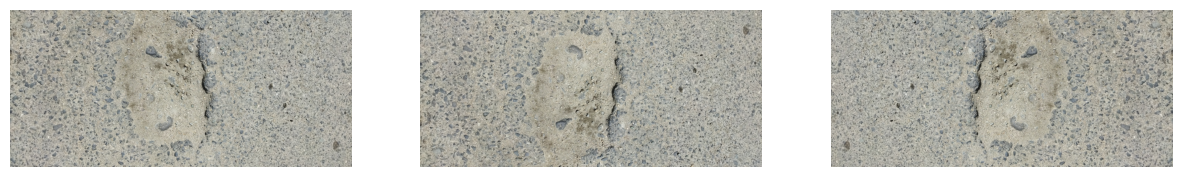

In [8]:
# ImageDataGenerator for flipping
datagen_flip = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# Create an iterator for flipping
it_flip = datagen_flip.flow(samples, batch_size=1)

# Prepare figure for flipped images
fig_flip, im_flip = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Generate batch of flipped images
for i in range(3):
    # Convert to unsigned integers
    flipped_image = next(it_flip)[0].astype('uint8')
    # Plot image
    im_flip[i].imshow(flipped_image)
    im_flip[i].axis('off')

# Show the plots
plt.show()

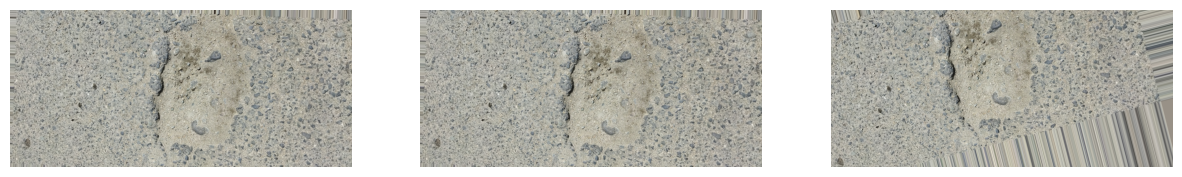

In [9]:
# ImageDataGenerator for Rotation
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')
# Create an iterator
it = datagen.flow(samples, batch_size=1)

# Prepare figure
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Generate batch of images
for i in range(3):
    # Convert to unsigned integers
    rotated_image = next(it)[0].astype('uint8')
    # Plot image
    im[i].imshow(rotated_image)
    im[i].axis('off')

# Show the plots
plt.show()

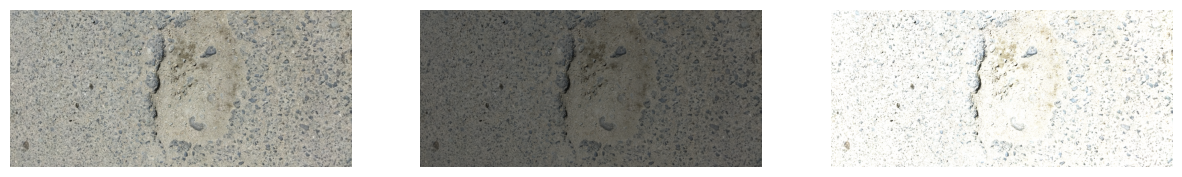

In [10]:
# Create image data augmentation generator for changing brightness
datagen = ImageDataGenerator(brightness_range=[0.5, 2.0])

# Create an iterator
it = datagen.flow(samples, batch_size=1)

# Prepare figure
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Generate batch of images
for i in range(3):
    # Convert to unsigned integers
    bright_image = next(it)[0].astype('uint8')
    # Plot image
    im[i].imshow(bright_image)
    im[i].axis('off')

# Show the plots
plt.show()

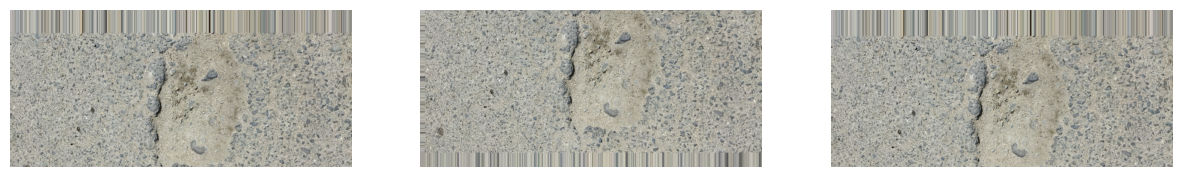

In [11]:
# Create image data augmentation generator for cropping
datagen = ImageDataGenerator(
    # Randomly crop images
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Create an iterator
it = datagen.flow(samples, batch_size=1)

# Prepare figure
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Generate batch of images
for i in range(3):
    # Generate batch of images
    cropped_image = next(it)[0].astype('uint8')
    # Plot image
    im[i].imshow(cropped_image)
    im[i].axis('off')

# Show the plots
plt.show()

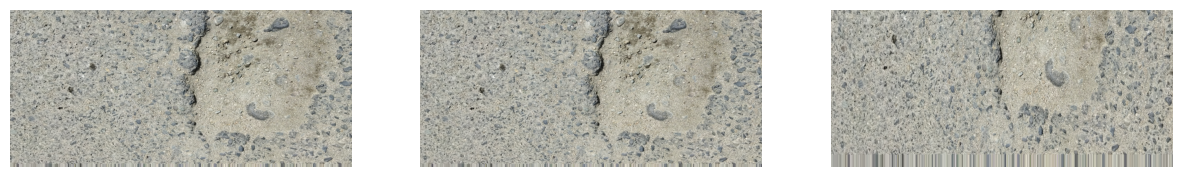

In [12]:
# Create image data augmentation generator for scaling
datagen = ImageDataGenerator(
    # Randomly zoom images
    zoom_range=[0.5, 1.0]
)

# Create an iterator
it = datagen.flow(samples, batch_size=1)

# Prepare figure
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Generate batch of images
for i in range(3):
    # Generate batch of images
    scaled_image = next(it)[0].astype('uint8')
    # Plot image
    im[i].imshow(scaled_image)
    im[i].axis('off')

# Show the plots
plt.show()

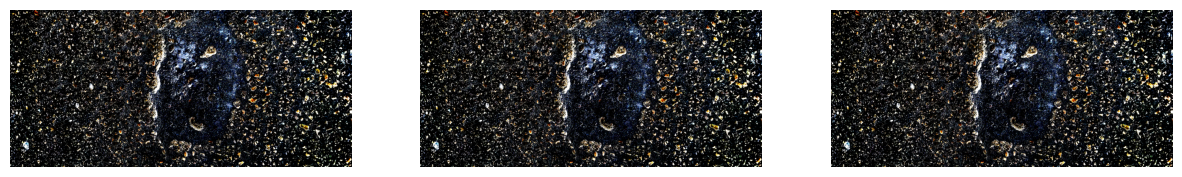

In [13]:
# Create image data augmentation generator for standardizing images
datagen = ImageDataGenerator(
    featurewise_center=True,             # Set featurewise_center to True for feature-wise centering
    featurewise_std_normalization=True  # Set featurewise_std_normalization to True for feature-wise standardization
)

# Assuming you have already fit the data generator to your dataset
datagen.fit(samples)

# Create an iterator
it = datagen.flow(samples, batch_size=1)

# Prepare figure
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Generate batch of images
for i in range(3):
    # Generate batch of images
    standardized_image = next(it)[0].astype('uint8')
    # Plot image
    im[i].imshow(standardized_image)
    im[i].axis('off')

# Show the plots
plt.show()